In [1]:
# Boosting
#https://www.kaggle.com/beagle01/prediction-with-gradient-boosting-classifier
# ensembles with svm
# https://www.youtube.com/watch?v=X3Wbfb4M33w

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


In [34]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [36]:
clf = DecisionTreeClassifier(random_state=0, max_depth = 3,  min_samples_leaf = 7)
# max_depth = None,  min_samples_leaf = 1, 
clf.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy on the training subset: 0.962
Accuracy on the test subset: 0.895


In [37]:
predictions = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[47  1]
 [14 81]]
()
Classification Report
             precision    recall  f1-score   support

          0       0.77      0.98      0.86        48
          1       0.99      0.85      0.92        95

avg / total       0.91      0.90      0.90       143



Text(0,0.5,u'Accuracy')

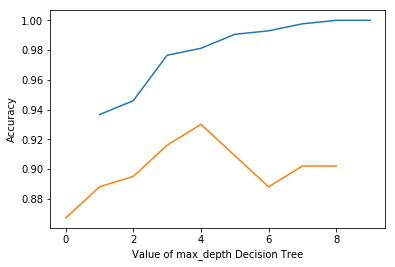

In [38]:
# try max_depth 1 through 6 and record training and testing accuracy
depth_range = list(range(1, 10))
train_scores = []
test_scores = []
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
for i in depth_range:
    clf = DecisionTreeClassifier(random_state=0, max_depth = i)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
# plot the relationship between K and testing accuracy
plt.plot(depth_range, train_scores, test_scores)
plt.xlabel('Value of max_depth Decision Tree')
plt.ylabel('Accuracy')

In [39]:
n_estimators = [5, 10, 20, 35, 50, 75, 100, 500, 1000]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

for n in n_estimators:
    gb = GradientBoostingClassifier(n_estimators=n, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("n estimators: ", n)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb.score(X_test, y_test)))
    print "total score: ", gb.score(X_train, y_train) + gb.score(X_test, y_test)
    print()

('n estimators: ', 5)
Accuracy score (training): 0.962
Accuracy score (test): 0.937
total score:  1.89950425162
()
('n estimators: ', 10)
Accuracy score (training): 0.981
Accuracy score (test): 0.930
total score:  1.91129058735
()
('n estimators: ', 20)
Accuracy score (training): 0.998
Accuracy score (test): 0.923
total score:  1.92072950524
()
('n estimators: ', 35)
Accuracy score (training): 1.000
Accuracy score (test): 0.923
total score:  1.92307692308
()
('n estimators: ', 50)
Accuracy score (training): 1.000
Accuracy score (test): 0.930
total score:  1.93006993007
()
('n estimators: ', 75)
Accuracy score (training): 1.000
Accuracy score (test): 0.958
total score:  1.95804195804
()
('n estimators: ', 100)
Accuracy score (training): 1.000
Accuracy score (test): 0.958
total score:  1.95804195804
()
('n estimators: ', 500)
Accuracy score (training): 1.000
Accuracy score (test): 0.958
total score:  1.95804195804
()
('n estimators: ', 1000)
Accuracy score (training): 1.000
Accuracy scor

In [40]:
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb.score(X_test, y_test)))
    print "total score: ", gb.score(X_train, y_train) + gb.score(X_test, y_test)
    print()

('Learning rate: ', 0.01)
Accuracy score (training): 0.615
Accuracy score (test): 0.664
total score:  1.27935913851
()
('Learning rate: ', 0.1)
Accuracy score (training): 0.977
Accuracy score (test): 0.916
total score:  1.89260973768
()
('Learning rate: ', 0.2)
Accuracy score (training): 0.986
Accuracy score (test): 0.930
total score:  1.91598542303
()
('Learning rate: ', 0.3)
Accuracy score (training): 0.993
Accuracy score (test): 0.937
total score:  1.93002068354
()
('Learning rate: ', 0.4)
Accuracy score (training): 0.993
Accuracy score (test): 0.937
total score:  1.93002068354
()
('Learning rate: ', 0.5)
Accuracy score (training): 0.998
Accuracy score (test): 0.923
total score:  1.92072950524
()
('Learning rate: ', 0.6)
Accuracy score (training): 0.998
Accuracy score (test): 0.937
total score:  1.93471551922
()
('Learning rate: ', 0.7)
Accuracy score (training): 0.998
Accuracy score (test): 0.944
total score:  1.94170852622
()
('Learning rate: ', 0.8)
Accuracy score (training): 0.9

In [10]:
# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[48  0]
 [11 84]]
()
Classification Report
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        48
          1       1.00      0.88      0.94        95

avg / total       0.94      0.92      0.92       143



In [11]:
# ROC curve and Area-Under-Curve (AUC)

y_scores_gb = gb.decision_function(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

Area under ROC curve = 0.99


Text(0,0.5,u'Accuracy')

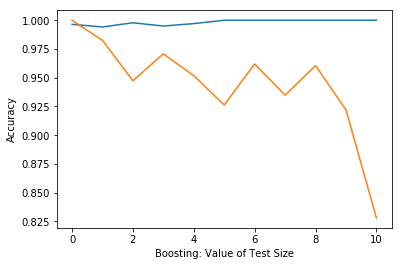

In [12]:
# try different test sizes and record training and testing accuracy
test_size = [.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]
ylims = [0,1,2,3,4,5,6,7,8,9,10]
train_scores = []
test_scores = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2)
    gb.fit(X_train, y_train)
    train_scores.append(gb.score(X_train, y_train))
    test_scores.append(gb.score(X_test, y_test))
    
# plot the relationship between K and testing accuracy
plt.plot(ylims, train_scores, test_scores)
plt.xlabel('Boosting: Value of Test Size')
plt.ylabel('Accuracy')

Text(0,0.5,u'Accuracy')

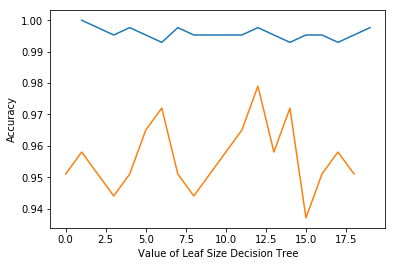

In [13]:
# try leaf 1 through 20 and record training and testing accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y)
leaf_range = list(range(1, 20))
train_scores = []
test_scores = []
for i in leaf_range:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, min_samples_leaf=i)
    gb.fit(X_train, y_train)
    train_scores.append(gb.score(X_train, y_train))
    test_scores.append(gb.score(X_test, y_test))

# plot the relationship between K and testing accuracy
plt.plot(leaf_range, train_scores, test_scores)
plt.xlabel('Value of Leaf Size Decision Tree')
plt.ylabel('Accuracy')

In [14]:
###### HOLDOUT ########

# Holdout 20%
X = cancer.data
y = cancer.target
X, X_test_holdout, y, y_test_holdout = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y)

train accuracy:  [99.609375, 99.560439560439562, 100.0, 100.0, 99.295774647887328, 100.0, 100.0, 100.0, 100.0]

cv accuracy:  [94.731070889894426, 93.806146572104026, 95.743589743589737, 95.325184619302277, 95.418719211822662, 93.883399209486171, 92.990196078431381, 95.0, 94.0]



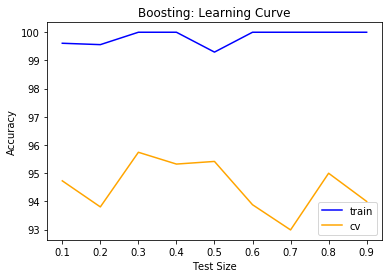

In [41]:
##### Learning Curve########

# try different test sizes and record training and testing and cv accuracy
test_size = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
ylims = [0,1,2,3,4,5,6,7,8]
train_scores = []
test_scores = []
cv_scores = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    train_scores.append(gb.score(X_train, y_train)*100)
    test_scores.append(gb.score(X_test, y_test)*100)
    cv = cross_val_score(gb, X_train, y_train, cv=10)
    cv_mean = np.array(cv).mean() * 100
    cv_scores.append(cv_mean)
    
       
print "train accuracy: ", train_scores
print
#print test_scores
#print
print "cv accuracy: ", cv_scores
print

plt.plot(test_size, train_scores, color='blue', label='train')
plt.plot(test_size, cv_scores, color='orange', label='cv')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Boosting: Learning Curve')
plt.legend()

train accuracy:  [63.380281690140848, 97.652582159624416, 98.356807511737088, 98.826291079812208, 99.53051643192488, 99.53051643192488, 99.765258215962433, 99.765258215962433, 99.765258215962433, 100.0, 100.0]

cv accuracy:  [63.388704318936881, 93.660022148394233, 93.194905869324472, 92.967884828349952, 94.844961240310084, 92.945736434108525, 94.141749723145068, 94.136212624584715, 95.310077519379846, 94.368770764119603, 93.903654485049842]



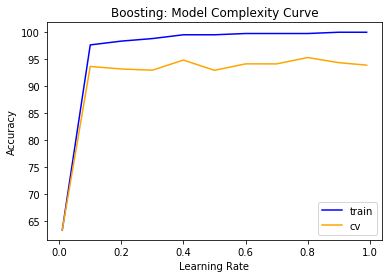

In [43]:
###### Model Complexity ########

# try leaf 1 through 20 and record training and testing accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y)
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
train_scores = []
test_scores = []
cv_scores = []
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    train_scores.append(gb.score(X_train, y_train)*100)
    test_scores.append(gb.score(X_test, y_test)*100)
    cv = cross_val_score(gb, X_train, y_train, cv=10)
    cv_mean = np.array(cv).mean() * 100
    cv_scores.append(cv_mean)

print "train accuracy: ", train_scores
print
#print test_scores
#print
print "cv accuracy: ", cv_scores
print

plt.plot(learning_rates, train_scores, color='blue', label='train')
plt.plot(learning_rates, cv_scores, color='orange', label='cv')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Boosting: Model Complexity Curve')
plt.legend()

In [17]:
##### Test Model On Holdout Group  #####
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=4, max_depth = 2)
gb.fit(X, y)
y_pred = gb.predict(X_test_holdout)

print('Accuracy on the training subset: {:.3f}'.format(gb.score(X, y)))
print('Accuracy on the test subset: {:.3f}'.format(gb.score(X_test_holdout, y_test_holdout)))
print(metrics.confusion_matrix(y_test_holdout, y_pred))

Accuracy on the training subset: 0.998
Accuracy on the test subset: 0.965
[[41  1]
 [ 3 69]]


In [18]:
# image segmentation

In [19]:
###########  image segmentation  ########

In [20]:
data = pd.read_csv('C:/Users/443966/Desktop/image_segmentation_1.csv')
print data.shape
print data.head()

X = data[data.columns.difference(['CLASS'])]
y = data['CLASS']

print
print X.shape
print y.shape

(2310, 20)
   CLASS  REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
0      1                  140                  125                   9   
1      1                  188                  133                   9   
2      1                  105                  139                   9   
3      1                   34                  137                   9   
4      1                   39                  111                   9   

   SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN  VEDGE-SD  \
0                   0.0                   0.0    0.277778  0.062963   
1                   0.0                   0.0    0.333333  0.266667   
2                   0.0                   0.0    0.277778  0.107407   
3                   0.0                   0.0    0.500000  0.166667   
4                   0.0                   0.0    0.722222  0.374074   

   HEDGE-MEAN  HEDGE-SD  INTENSITY-MEAN  RAWRED-MEAN  RAWBLUE-MEAN  \
0    0.666667  0.311111        6.185185     7.3

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

clf = DecisionTreeClassifier(random_state=0, max_depth = 3,  min_samples_leaf = 7)
# max_depth = None,  min_samples_leaf = 1, 
clf.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy on the training subset: 0.577
Accuracy on the test subset: 0.550


In [22]:
predictions = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[ 67   0   0   0   0   0   0]
 [  0  79   0   0   0   0   0]
 [ 83   0   0   0   0   0   0]
 [ 69   0   0   0   0   3   0]
 [105   0   0   0   0   0   0]
 [  0   0   0   0   0  88   0]
 [  0   0   0   0   0   0  84]]
()
Classification Report
             precision    recall  f1-score   support

          1       0.21      1.00      0.34        67
          2       1.00      1.00      1.00        79
          3       0.00      0.00      0.00        83
          4       0.00      0.00      0.00        72
          5       0.00      0.00      0.00       105
          6       0.97      1.00      0.98        88
          7       1.00      1.00      1.00        84

avg / total       0.45      0.55      0.47       578



C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
n_estimators = [5, 10, 20, 35, 50, 75, 100]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

for n in n_estimators:
    gb = GradientBoostingClassifier(n_estimators=n, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", n)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb.score(X_test, y_test)))
    print "total score: ", gb.score(X_train, y_train) + gb.score(X_test, y_test)
    print()

('Learning rate: ', 5)
Accuracy score (training): 0.919
Accuracy score (test): 0.920
total score:  1.83958381614
()
('Learning rate: ', 10)
Accuracy score (training): 0.966
Accuracy score (test): 0.950
total score:  1.91576232449
()
('Learning rate: ', 20)
Accuracy score (training): 0.989
Accuracy score (test): 0.964
total score:  1.95269784316
()
('Learning rate: ', 35)
Accuracy score (training): 0.999
Accuracy score (test): 0.969
total score:  1.96770339708
()
('Learning rate: ', 50)
Accuracy score (training): 1.000
Accuracy score (test): 0.974
total score:  1.97404844291
()
('Learning rate: ', 75)
Accuracy score (training): 1.000
Accuracy score (test): 0.976
total score:  1.97577854671
()
('Learning rate: ', 100)
Accuracy score (training): 1.000
Accuracy score (test): 0.972
total score:  1.9723183391
()


In [24]:
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb.score(X_test, y_test)))
    print "total score: ", gb.score(X_train, y_train) + gb.score(X_test, y_test)
    print()

('Learning rate: ', 0.01)
Accuracy score (training): 0.868
Accuracy score (test): 0.851
total score:  1.7189939826
()
('Learning rate: ', 0.1)
Accuracy score (training): 0.939
Accuracy score (test): 0.945
total score:  1.88343575441
()
('Learning rate: ', 0.2)
Accuracy score (training): 0.964
Accuracy score (test): 0.955
total score:  1.91922053429
()
('Learning rate: ', 0.3)
Accuracy score (training): 0.979
Accuracy score (test): 0.965
total score:  1.94403533727
()
('Learning rate: ', 0.4)
Accuracy score (training): 0.984
Accuracy score (test): 0.958
total score:  1.9428885941
()
('Learning rate: ', 0.5)
Accuracy score (training): 0.989
Accuracy score (test): 0.964
total score:  1.95269784316
()
('Learning rate: ', 0.6)
Accuracy score (training): 0.994
Accuracy score (test): 0.967
total score:  1.96077698842
()
('Learning rate: ', 0.7)
Accuracy score (training): 0.996
Accuracy score (test): 0.964
total score:  1.95962624963
()
('Learning rate: ', 0.8)
Accuracy score (training): 0.995

In [25]:
# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[66  0  0  0  1  0  0]
 [ 0 79  0  0  0  0  0]
 [ 0  0 77  2  4  0  0]
 [ 0  0  1 69  2  0  0]
 [ 2  0  5  1 97  0  0]
 [ 0  0  0  1  0 87  0]
 [ 2  0  0  0  0  0 82]]
()
Classification Report
             precision    recall  f1-score   support

          1       0.94      0.99      0.96        67
          2       1.00      1.00      1.00        79
          3       0.93      0.93      0.93        83
          4       0.95      0.96      0.95        72
          5       0.93      0.92      0.93       105
          6       1.00      0.99      0.99        88
          7       1.00      0.98      0.99        84

avg / total       0.96      0.96      0.96       578



Text(0,0.5,u'Accuracy')

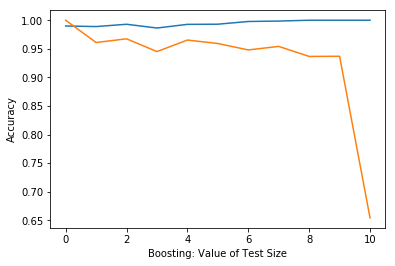

In [26]:
# try different test sizes and record training and testing accuracy
test_size = [.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]
ylims = [0,1,2,3,4,5,6,7,8,9,10]
train_scores = []
test_scores = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2)
    gb.fit(X_train, y_train)
    train_scores.append(gb.score(X_train, y_train))
    test_scores.append(gb.score(X_test, y_test))
    
# plot the relationship between K and testing accuracy
plt.plot(ylims, train_scores, test_scores)
plt.xlabel('Boosting: Value of Test Size')
plt.ylabel('Accuracy')

Text(0,0.5,u'Accuracy')

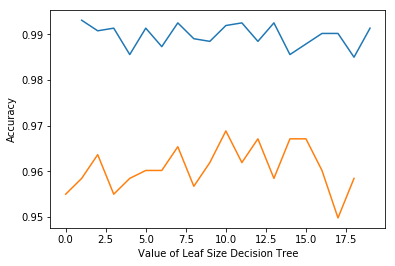

In [27]:
# try leaf 1 through 20 and record training and testing accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y)
leaf_range = list(range(1, 20))
train_scores = []
test_scores = []
for i in leaf_range:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, min_samples_leaf=i)
    gb.fit(X_train, y_train)
    train_scores.append(gb.score(X_train, y_train))
    test_scores.append(gb.score(X_test, y_test))

# plot the relationship between K and testing accuracy
plt.plot(leaf_range, train_scores, test_scores)
plt.xlabel('Value of Leaf Size Decision Tree')
plt.ylabel('Accuracy')

In [28]:
###### HOLDOUT ########

# Holdout 20%
X = data[data.columns.difference(['CLASS'])]
y = data['CLASS']
X, X_test_holdout, y, y_test_holdout = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y)



train accuracy:  [99.218280216476245, 99.255751014884979, 99.535962877030158, 99.819494584837543, 99.783549783549788, 99.72936400541272, 99.819494584837543, 100.0, 100.0]

cv accuracy:  [96.454702639940621, 95.663098801036583, 96.680605366345887, 95.670673469287266, 96.011052683654299, 95.671718205063556, 92.819740755881512, 91.035763773927343, 90.6796402771635]



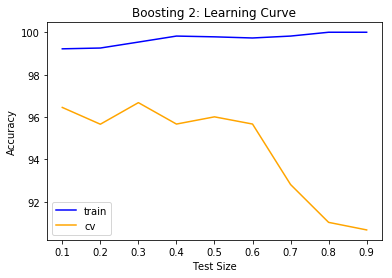

In [29]:
##### Learning Curve########

# try different test sizes and record training and testing and cv accuracy
test_size = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
ylims = [0,1,2,3,4,5,6,7,8]
train_scores = []
test_scores = []
cv_scores = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    train_scores.append(gb.score(X_train, y_train)*100)
    test_scores.append(gb.score(X_test, y_test)*100)
    cv = cross_val_score(gb, X_train, y_train, cv=10)
    cv_mean = np.array(cv).mean() * 100
    cv_scores.append(cv_mean)
    
       
print "train accuracy: ", train_scores
print
#print test_scores
#print
print "cv accuracy: ", cv_scores
print

plt.plot(test_size, train_scores, color='blue', label='train')
plt.plot(test_size, cv_scores, color='orange', label='cv')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Boosting 2: Learning Curve')
plt.legend()



train accuracy:  [89.105339105339112, 94.372294372294377, 96.53679653679653, 97.835497835497833, 98.773448773448763, 99.567099567099575, 99.639249639249641, 99.567099567099575, 99.927849927849934, 99.855699855699854, 99.927849927849934]

cv accuracy:  [86.5119981580564, 91.913695340595623, 94.508285168185807, 95.594488696919143, 95.668099116677666, 95.2398570503657, 96.24487732678692, 95.810563721734198, 83.004678995021024, 79.036768510725068, 63.605171220938459]



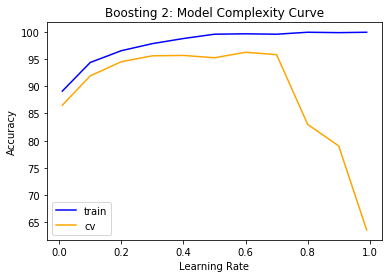

In [30]:
###### Model Complexity ########

# try leaf 1 through 20 and record training and testing accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y)
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
train_scores = []
test_scores = []
cv_scores = []
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    train_scores.append(gb.score(X_train, y_train)*100)
    test_scores.append(gb.score(X_test, y_test)*100)
    cv = cross_val_score(gb, X_train, y_train, cv=10)
    cv_mean = np.array(cv).mean() * 100
    cv_scores.append(cv_mean)

print "train accuracy: ", train_scores
print
#print test_scores
#print
print "cv accuracy: ", cv_scores
print

plt.plot(learning_rates, train_scores, color='blue', label='train')
plt.plot(learning_rates, cv_scores, color='orange', label='cv')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Boosting 2: Model Complexity Curve')
plt.legend()



In [31]:
##### Test Model On Holdout Group  #####
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=3, max_depth = 2)
gb.fit(X, y)
y_pred = gb.predict(X_test_holdout)

print('Accuracy on the training subset: {:.3f}'.format(gb.score(X, y)))
print('Accuracy on the test subset: {:.3f}'.format(gb.score(X_test_holdout, y_test_holdout)))
print(metrics.confusion_matrix(y_test_holdout, y_pred))

Accuracy on the training subset: 0.991
Accuracy on the test subset: 0.974
[[51  0  0  0  0  0  0]
 [ 0 66  0  0  0  0  0]
 [ 1  0 66  3  4  0  0]
 [ 0  0  0 67  1  0  0]
 [ 0  0  0  1 71  0  0]
 [ 0  0  0  1  0 77  0]
 [ 0  0  1  0  0  0 52]]


In [32]:
adb = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 5, learning_rate = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

n_estimators = [5, 10, 20, 35, 50, 75, 100]
for n in n_estimators:
    adb = AdaBoostClassifier(clf, n_estimators = 5, learning_rate = 1)
    adb.fit(X_train, y_train)
    print("Learning rate: ", n)
    print("Accuracy score (training): {0:.3f}".format(adb.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(adb.score(X_test, y_test)))
    print "total score: ", adb.score(X_train, y_train) + adb.score(X_test, y_test)
    print()

('Learning rate: ', 5)
Accuracy score (training): 0.926
Accuracy score (test): 0.907
total score:  1.83333333333
()
('Learning rate: ', 10)
Accuracy score (training): 0.926
Accuracy score (test): 0.907
total score:  1.83333333333
()
('Learning rate: ', 20)
Accuracy score (training): 0.926
Accuracy score (test): 0.907
total score:  1.83333333333
()
('Learning rate: ', 35)
Accuracy score (training): 0.926
Accuracy score (test): 0.907
total score:  1.83333333333
()
('Learning rate: ', 50)
Accuracy score (training): 0.926
Accuracy score (test): 0.907
total score:  1.83333333333
()
('Learning rate: ', 75)
Accuracy score (training): 0.926
Accuracy score (test): 0.907
total score:  1.83333333333
()
('Learning rate: ', 100)
Accuracy score (training): 0.926
Accuracy score (test): 0.907
total score:  1.83333333333
()
